In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from numpy.fft import fft, ifft

In [10]:
def ece420ProcessFrame(frame, Fs):

    #### YOUR CODE HERE ####
    energy = np.zeros(frame.shape[0])
    for i in range(frame.shape[0]):
        energy[i] = pow(frame[i], 2)

    if (sum(energy) < 1900000000):
        return -1

    auto_corr = ifft(fft(frame)*np.conj(fft(frame)))

    auto_corr = auto_corr/auto_corr[0]

    count = 0
    index0 = 0
    index1 = 0
    index2 = 0

    max_value = np.max(auto_corr[20:FRAME_SIZE-20])

    for i in range(len(auto_corr)):
        if ((auto_corr[i] > 0 and auto_corr[i + 1] < 0) and (count == 0)):
            index0 = i
        if(auto_corr[i] < 0 and (auto_corr[i+1] > 0) ):
           index1 = i
           count = 1
        if((auto_corr[i] > 0 and auto_corr[i+1] < 0) and (count == 1)):
            index2 = i

            if(abs(max_value - np.max(auto_corr[index1:index2])) < 0.1 ):
                if(index1 < Fs/300):
                    pass
                else:
                    break

    max_index = np.argmax(auto_corr[index1:index2])
    freq = Fs/(max_index+index1)
    
    return freq

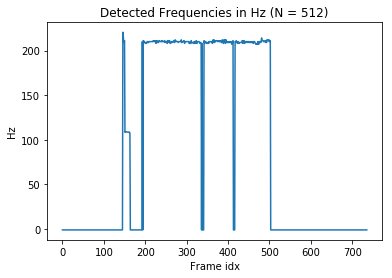

In [11]:
################# GIVEN CODE BELOW #####################

Fs, data = read('test_vector.wav')

FRAME_SIZE = 512
numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ece420ProcessFrame(frame.astype(float), Fs)

plt.figure()
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frame idx')
plt.ylabel('Hz')
plt.title('Detected Frequencies in Hz (N = 512)')
plt.show()

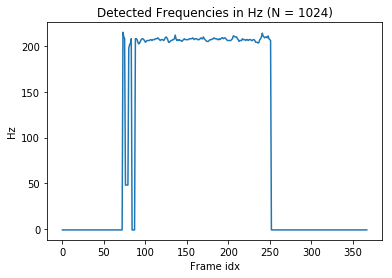

In [12]:


FRAME_SIZE = 1024

numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)
for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ece420ProcessFrame(frame.astype(float), Fs)

plt.figure()
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frame idx')
plt.ylabel('Hz')
plt.title('Detected Frequencies in Hz (N = 1024)')
plt.show()

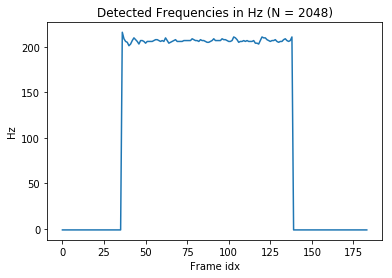

In [13]:


FRAME_SIZE = 2048

numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)
for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ece420ProcessFrame(frame.astype(float), Fs)

plt.figure()
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frame idx')
plt.ylabel('Hz')
plt.title('Detected Frequencies in Hz (N = 2048)')
plt.show()

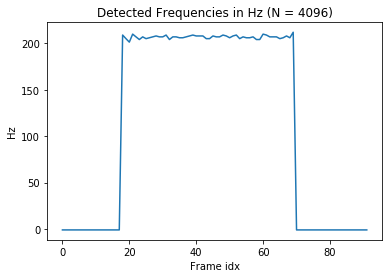

In [14]:


FRAME_SIZE = 4096
numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)
for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ece420ProcessFrame(frame.astype(float), Fs)

plt.figure()
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frame idx')
plt.ylabel('Hz')
plt.title('Detected Frequencies in Hz (N = 4096)')
plt.show()

#### Answer:
1. We use the peak that is close to the maximum of all peaks with the smallest index to ignore the noisy peaks.
2. We ignore the first few index (10-20) of the autocorrelation because the value cannot be used to find the fundamental frequency.
3. It's a reasonable length that contains useful information about the frequency. If it's too small, we might not detect the fundamental frequency if the frequency is low. If it's too big, the frequency might change in the range of one frame, and information will be lost. 
4. the resolution will be higher for smaller N but the frequency range will be smaller, because the range for frequency detection is Fs/N to very large frequency (if the first peak is close to zero index).